# Ánalise da base com Clusters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Exploração dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [5]:
df.shape

(42305, 22)

In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [8]:
df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'Unnamed: 0'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

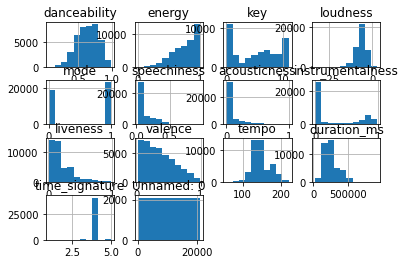

In [9]:
df.hist()

## Limpeza dos dados

In [10]:
df = df.drop(['type','uri','track_href','analysis_url','id','song_name','Unnamed: 0','title'],axis=1)

In [11]:
df['duration_min'] = df['duration_ms'] / 60000
df.drop('duration_ms',axis=1,inplace=True)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,4,Dark Trap,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,4,Dark Trap,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,4,Dark Trap,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,3,Dark Trap,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4,Dark Trap,2.054967


In [12]:
df['duration_min'].describe()

count    42305.000000
mean         4.181097
std          1.715962
min          0.426667
25%          2.997333
50%          3.746000
75%          5.018883
max         15.217533
Name: duration_min, dtype: float64

# Exploração e Analise dos dados

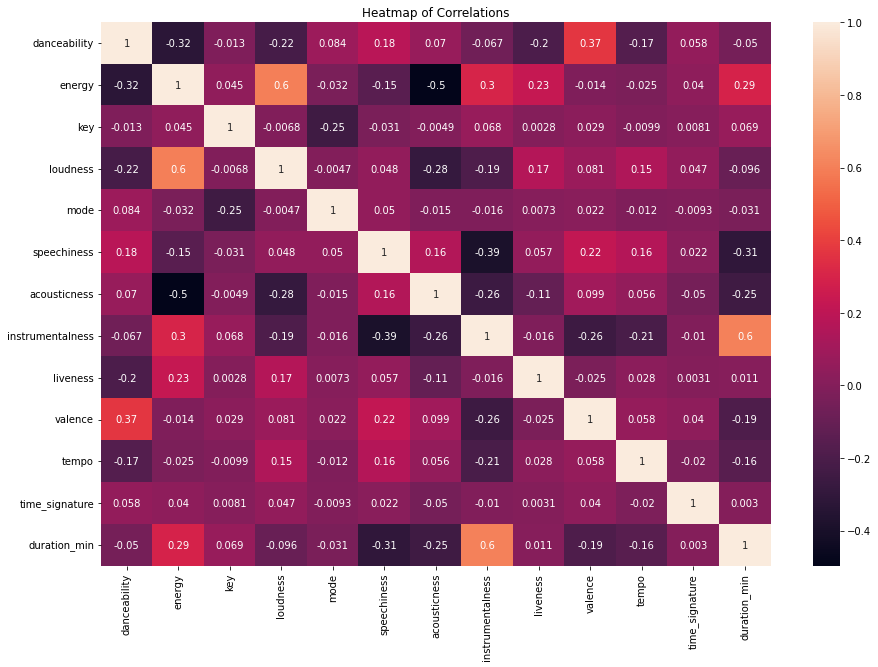

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap of Correlations')
plt.show()

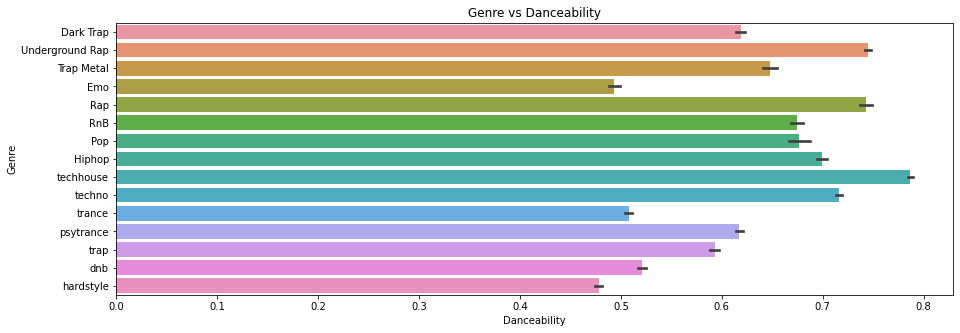

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='danceability', y='genre', data=df)
plt.title('Genre vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Genre')
plt.show()

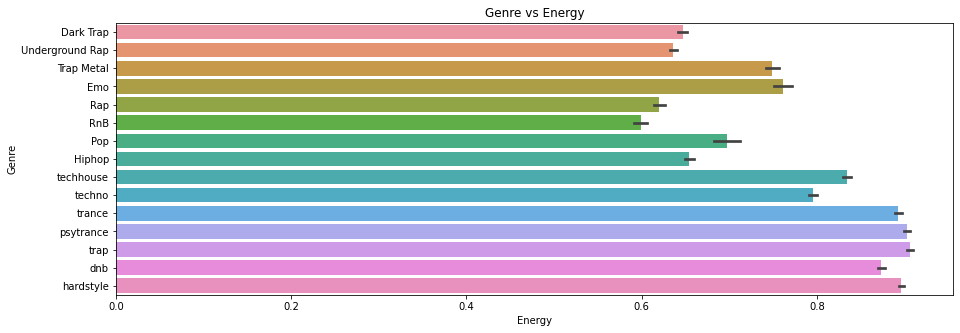

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(x='energy', y='genre', data=df)
plt.title('Genre vs Energy')
plt.xlabel('Energy')
plt.ylabel('Genre')
plt.show()

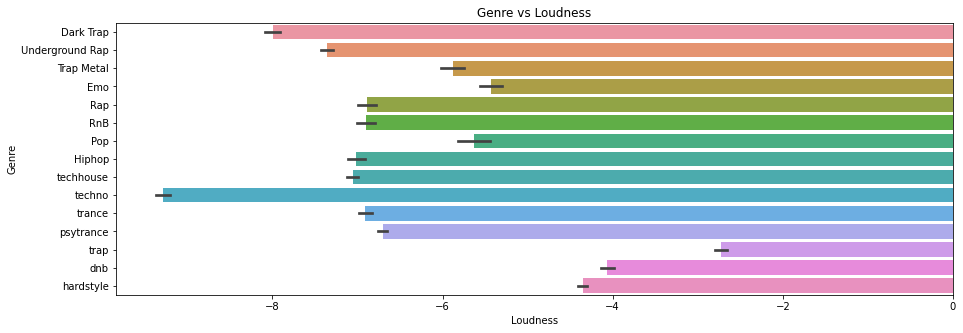

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(x='loudness', y='genre', data=df)
plt.title('Genre vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Genre')
plt.show()

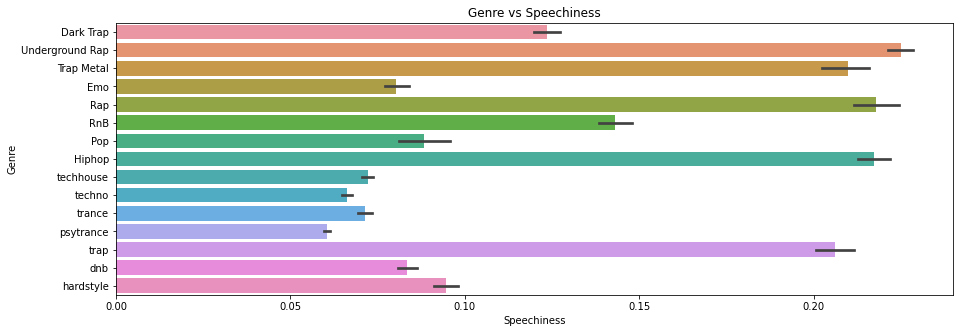

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x='speechiness', y='genre', data=df)
plt.title('Genre vs Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Genre')
plt.show()

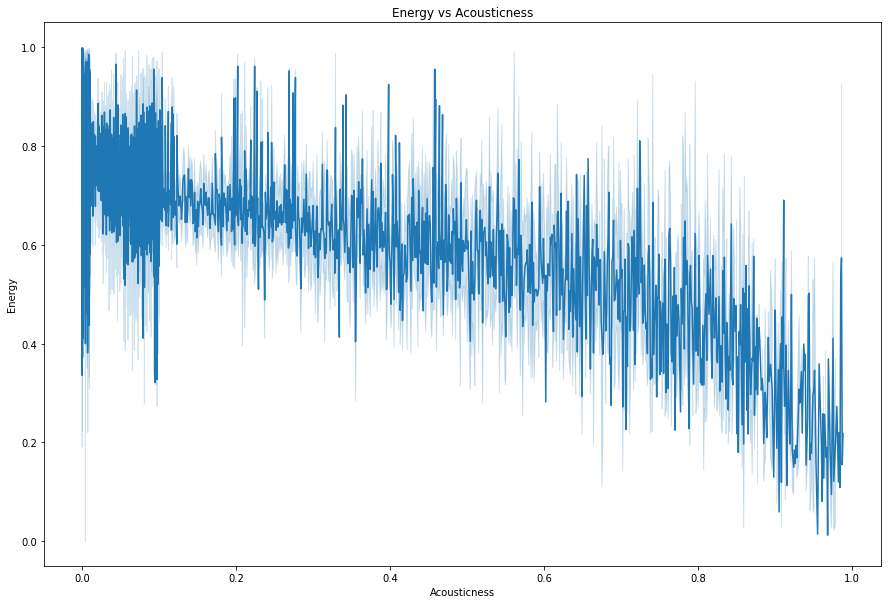

In [19]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='acousticness', y='energy', data=df)
plt.title('Energy vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

## Modelagem
Vamos utilizar a técnica de Hopkins que é uma forma de medir a tendência de agrupamento de um conjunto de dados. Pertence à família dos testes de amostragem esparsa. Ele atua como um teste de hipótese estatística em que a hipótese nula é que os dados são gerados por um processo de ponto de Poisson e, portanto, são distribuídos aleatoriamente de maneira uniforme.

In [20]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]

    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(df.drop(['genre'],axis=1))

0.919372251402495

In [22]:
df_non_genre = df.drop('genre', axis=1)

In [23]:
scaler = StandardScaler()
non_genre_scaled = scaler.fit_transform(df_non_genre)

In [24]:
df_non_genre_scaled = pd.DataFrame(non_genre_scaled)
df_non_genre_scaled.columns = list(df.drop('genre',axis=1).columns)
df_non_genre_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876,0.102184,-1.226992
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,0.102184,-0.256796
2,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861,0.102184,-1.476787
3,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485,-3.624453,-1.235520
4,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554,0.102184,-1.239046


In [25]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_non_genre_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_non_genre_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.1487113871269223
For n_clusters=3, the silhouette score is 0.13630323625820553
For n_clusters=4, the silhouette score is 0.1348119267511234
For n_clusters=5, the silhouette score is 0.12440752428223574
For n_clusters=6, the silhouette score is 0.1291814101527808
For n_clusters=7, the silhouette score is 0.12036682949814025
For n_clusters=8, the silhouette score is 0.11751575157042962


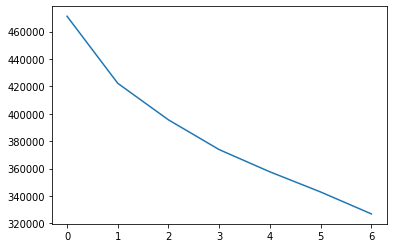

In [26]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_non_genre_scaled)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

### Agrupar as músicas em 4 clusters

In [27]:
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(df_non_genre_scaled)

KMeans(max_iter=100, n_clusters=4)

In [28]:
kmeans.labels_

array([0, 2, 1, ..., 1, 1, 1], dtype=int32)

In [29]:
df['Cluster_ID'] = kmeans.labels_
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min,Cluster_ID
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,4,Dark Trap,2.075650,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,4,Dark Trap,3.740450,2
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,4,Dark Trap,1.647017,1
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,3,Dark Trap,2.061017,1
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4,Dark Trap,2.054967,0


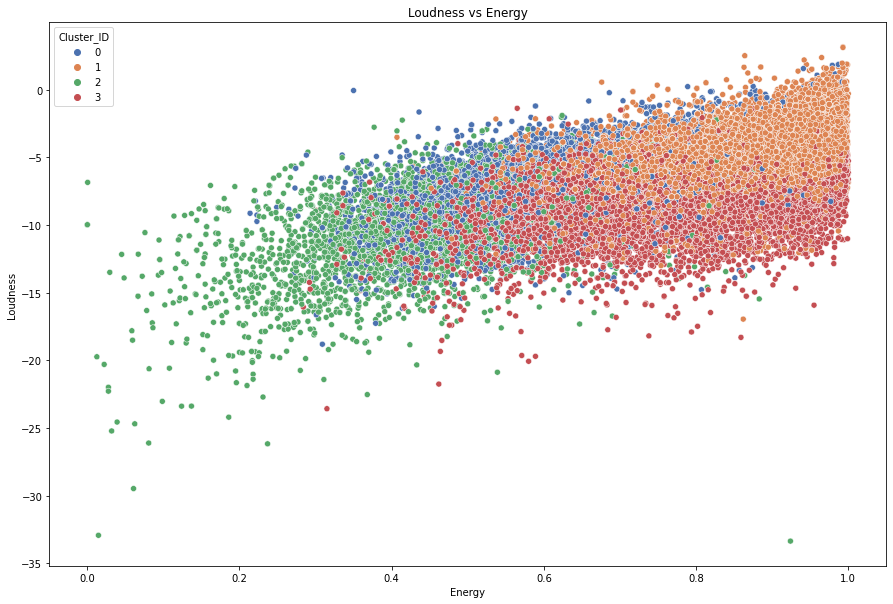

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='energy', y='loudness', data=df, hue='Cluster_ID', palette='deep')
plt.title('Loudness vs Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

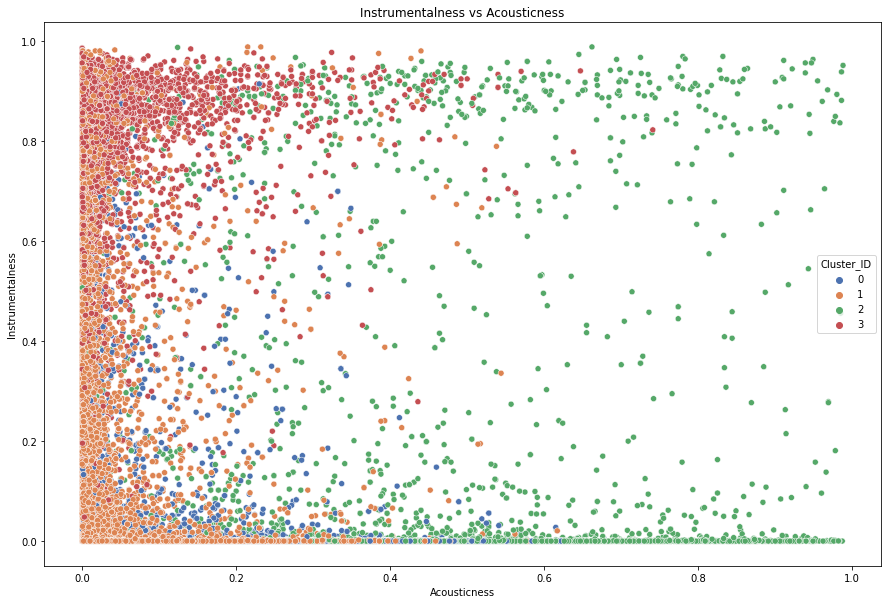

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='acousticness', y='instrumentalness', data=df, hue='Cluster_ID', palette='deep')
plt.title('Instrumentalness vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.show()

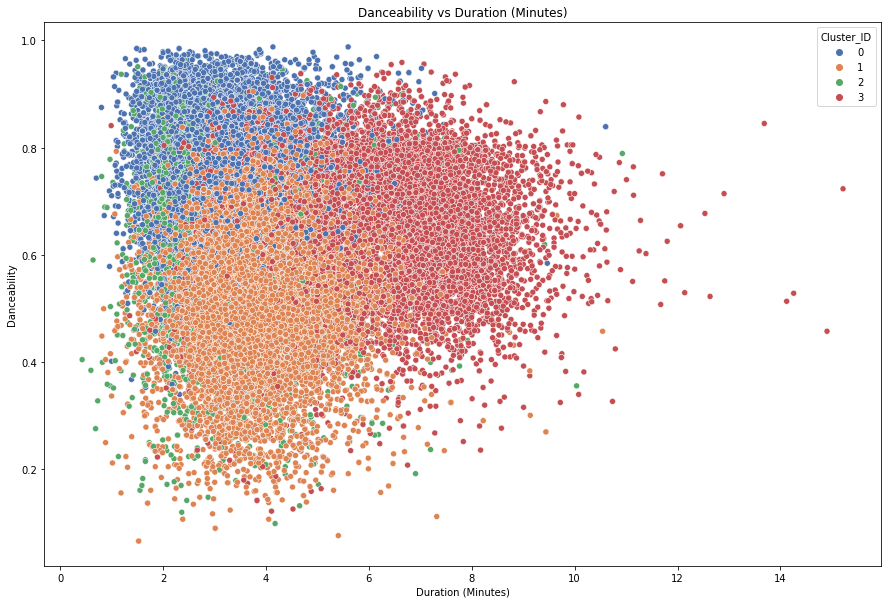

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='duration_min', y='danceability', data=df, hue='Cluster_ID', palette='deep')
plt.title('Danceability vs Duration (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Danceability')
plt.show()

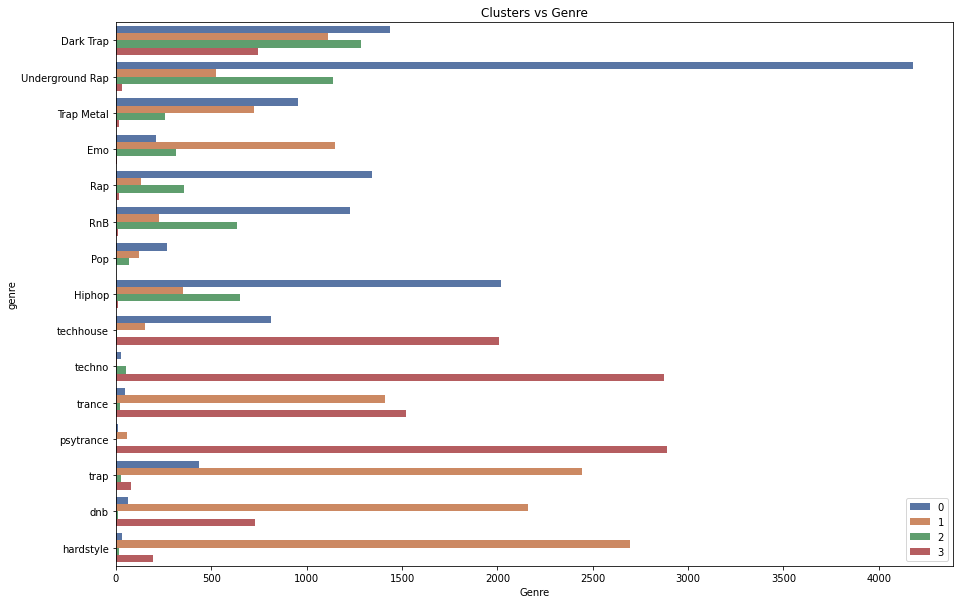

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(y='genre', data=df, hue='Cluster_ID', palette='deep')
plt.title('Clusters vs Genre')
plt.xlabel('Genre')
plt.legend()
plt.show()

### Agora vamos construir nosso modelo de previsão para a duração da música.

In [34]:
status = pd.get_dummies(df['genre'], drop_first = True)
Songs = pd.concat([df, status], axis = 1)
Songs.drop(['genre'], axis = 1, inplace = True)

In [35]:
Songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,0,0,0,0,0,0,0,0,0,0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,0,0,0,0,0,0,0,0,0,0
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0,0,0,0,0,0,0,0,0,0
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0,0,0,0,0,0,0,0,0,0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Songs = Songs.drop('Cluster_ID',axis=1)
Songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  time_signature    42305 non-null  int64  
 12  duration_min      42305 non-null  float64
 13  Emo               42305 non-null  uint8  
 14  Hiphop            42305 non-null  uint8  
 15  Pop               42305 non-null  uint8  
 16  Rap               42305 non-null  uint8 

In [37]:
Songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,...,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,...,0.049616,0.046236,0.138872,0.070110,0.069401,0.069992,0.070323,0.069874,0.070890,0.070606
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,...,0.217153,0.209998,0.345817,0.255335,0.254137,0.255136,0.255693,0.254937,0.256644,0.256169
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
X = Songs.drop('duration_min',axis=1)
y = Songs['duration_min']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
y_train.head()

40531    4.660000
24239    6.250000
24828    7.570317
5281     2.526667
24530    6.330650
Name: duration_min, dtype: float64

In [41]:
y_test.head()

568      4.622717
19326    3.513333
35953    4.487867
16785    4.153183
35825    3.700883
Name: duration_min, dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
0,-0.622187,1.141105,-0.101854,0.953353,-1.101467,-0.517808,-0.524796,-0.759081,-0.890750,0.649702,...,-0.228955,-0.22159,-0.398149,-0.273146,3.643927,-0.272575,-0.275566,-0.277123,-0.275778,-0.277264
1,1.065708,0.955630,0.989791,0.350686,-1.101467,-0.700638,-0.561547,1.677716,-0.715263,2.471407,...,-0.228955,-0.22159,-0.398149,-0.273146,-0.274429,-0.272575,3.628898,-0.277123,-0.275778,-0.277264
2,1.091282,0.590133,0.443968,-0.813201,-1.101467,-0.649984,-0.418955,1.413339,-0.711275,-1.447617,...,-0.228955,-0.22159,-0.398149,-0.273146,-0.274429,-0.272575,-0.275566,3.608505,-0.275778,-0.277264
3,0.982592,-0.489990,0.716880,-0.690222,0.907880,0.287908,0.083298,-0.763721,-0.316429,1.656997,...,-0.228955,-0.22159,2.511622,-0.273146,-0.274429,-0.272575,-0.275566,-0.277123,-0.275778,-0.277264
4,1.008166,0.557402,1.262703,-1.702593,-1.101467,-0.672145,-0.551152,1.772136,-0.726089,-1.021981,...,-0.228955,-0.22159,-0.398149,-0.273146,-0.274429,-0.272575,-0.275566,3.608505,-0.275778,-0.277264


In [44]:
col = X_test.columns
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)
X_test.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
0,0.122157,-0.447581,-0.916295,-0.829024,0.900022,-0.659384,1.596830,-0.762058,1.308888,0.366268,...,-0.227392,-0.216845,-0.409542,-0.277914,-0.269936,-0.278408,-0.27378,-0.2669,-0.277256,-0.271780
1,0.173089,-0.961095,-0.098977,0.159605,-1.111084,-0.821619,1.180488,-0.674959,-0.877060,2.534065,...,-0.227392,-0.216845,-0.409542,-0.277914,-0.269936,-0.278408,-0.27378,-0.2669,-0.277256,-0.271780
2,-1.463114,1.222689,-0.098977,1.257248,-1.111084,0.108050,-0.458646,1.326240,1.422709,0.138757,...,-0.227392,-0.216845,-0.409542,-0.277914,-0.269936,-0.278408,-0.27378,-0.2669,-0.277256,3.679453
3,-0.476299,-2.020554,0.990780,-1.063746,-1.111084,-0.779470,3.895268,-0.761721,0.199125,0.400610,...,4.397698,-0.216845,-0.409542,-0.277914,-0.269936,-0.278408,-0.27378,-0.2669,-0.277256,-0.271780
4,0.185822,1.217284,-0.916295,0.979601,0.900022,0.084192,-0.546534,-0.761807,0.739779,-0.217534,...,-0.227392,-0.216845,-0.409542,-0.277914,-0.269936,-0.278408,-0.27378,-0.2669,-0.277256,3.679453


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('danceability', False, 15),
 ('energy', False, 9),
 ('key', False, 17),
 ('loudness', False, 8),
 ('mode', False, 11),
 ('speechiness', False, 13),
 ('acousticness', False, 7),
 ('instrumentalness', True, 1),
 ('liveness', False, 10),
 ('valence', False, 6),
 ('tempo', False, 16),
 ('time_signature', False, 14),
 ('Emo', False, 3),
 ('Hiphop', True, 1),
 ('Pop', False, 5),
 ('Rap', False, 4),
 ('RnB', True, 1),
 ('Trap Metal', True, 1),
 ('Underground Rap', False, 12),
 ('dnb', True, 1),
 ('hardstyle', True, 1),
 ('psytrance', True, 1),
 ('techhouse', True, 1),
 ('techno', True, 1),
 ('trance', True, 1),
 ('trap', False, 2)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['instrumentalness', 'Hiphop', 'RnB', 'Trap Metal', 'dnb', 'hardstyle',
       'psytrance', 'techhouse', 'techno', 'trance'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'time_signature', 'Emo',
       'Pop', 'Rap', 'Underground Rap', 'trap'],
      dtype='object')

In [48]:
y_train = y_train.values.reshape(-1,1)
X_train_rfe = X_train[col]

In [49]:
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     4646.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:20:20   Log-Likelihood:                -44077.
No. Observations:               29613   AIC:                         8.818e+04
Df Residuals:                   29602   BIC:                         8.827e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.1868      0.006    671.991      0.000       4.175       4.199
instrumentalness     0.2806      0.009     30.615      0.000       0.263       0.299
Hiphop               0.1618      0.007     24.757      0.000       0.149       0.175
RnB                  0.1319      0.006     20.419      0.000       0.119       0.145
Trap Metal          -0.1638      0.006    -25.484      0.000      -0.176      -0.151
dnb                  0.3169      0.007     46.330      0.000       0.304       0.330
hardstyle            0.1412      0.007     21.715      0.000       0.128       0.154
psytrance            0.9324      0.008    121.572      0.000       0.917       0.947
techhouse            0.3291      0.007     46.178      0.000       0.315       0.343
techno               0.7311      0.008     91.501      0.000       0.715       0.747
trance               0.3229      0.007     46.823      0.000       0.309       0.336
==============================================================================
Omnibus:                     3510.130   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9801.005
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                       5.497   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,instrumentalness,2.16
9,techno,1.64
7,psytrance,1.52
8,techhouse,1.31
10,trance,1.22
5,dnb,1.21
2,Hiphop,1.10
6,hardstyle,1.09
3,RnB,1.07
4,Trap Metal,1.06


In [51]:
y_train_min = lm.predict(X_train_rfe)
y_train_min = y_train_min.values.reshape(-1,1)

In [52]:
y_train_min.shape

(29613, 1)

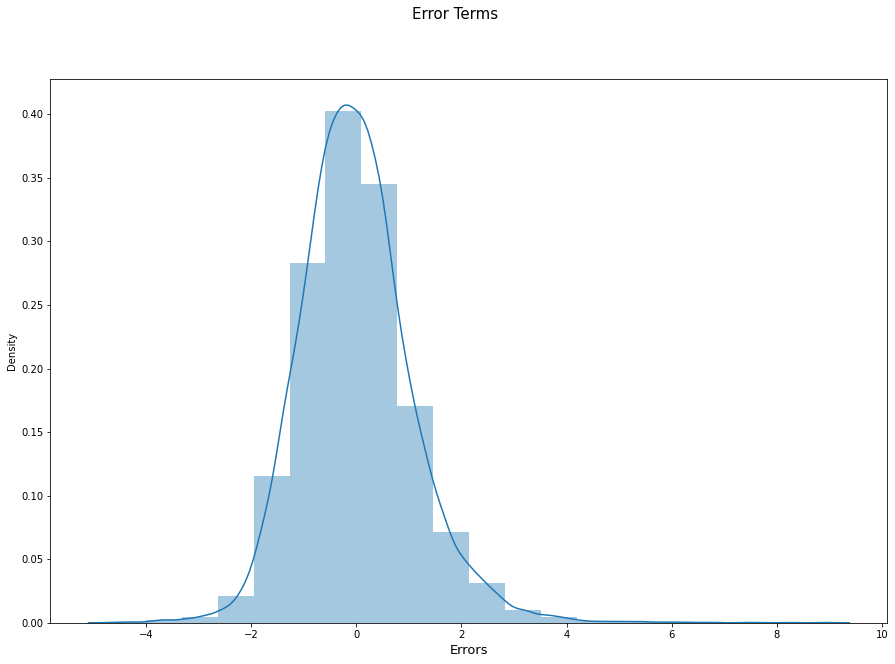

In [53]:
fig = plt.figure(figsize=(15,10))
sns.distplot((y_train - y_train_min), bins=20)
fig.suptitle('Error Terms', fontsize=15)      
plt.xlabel('Errors', fontsize=13)                         
plt.show()

In [54]:
X_test_new = sm.add_constant(X_test)

In [55]:
X_test_new = X_test_new[X_train_rfe.columns]

In [56]:
y_pred = lm.predict(X_test_new)

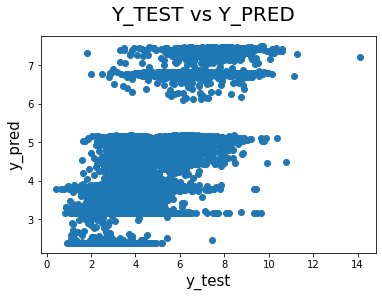

In [57]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Y_TEST vs Y_PRED', fontsize=20)       
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred', fontsize=15)       
plt.show()

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6148388040519075

In [59]:
X_train_rfe = X_train_rfe.drop('const',axis=1)

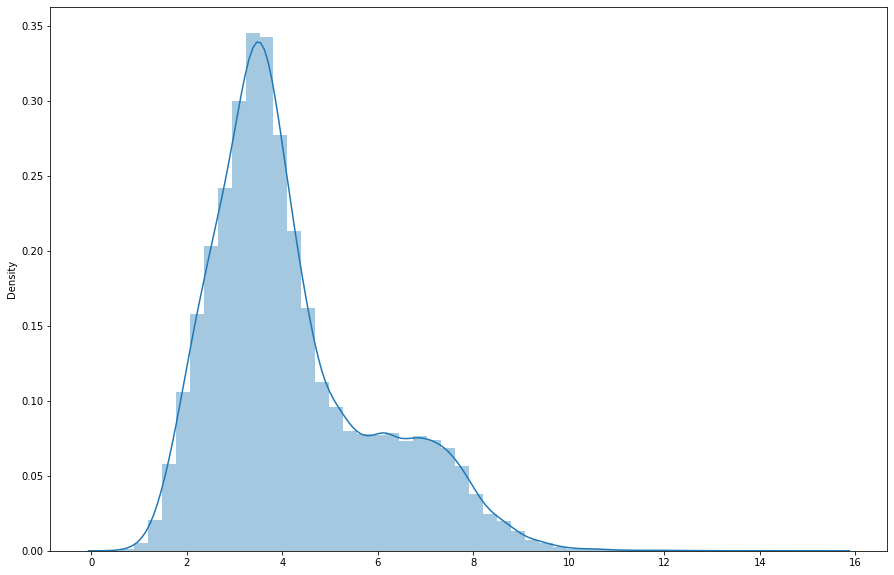

In [60]:
plt.figure(figsize=(15,10))
sns.distplot(y_train)
plt.show()

Como podemos ver, o modelo não se ajusta aos dados.<br>
Também notamos que a distribuição da variável de destino é assimétrica para a esquerda. Portanto, teremos que aplicar uma transformação
para isso antes de prosseguirmos com a regressão do cume.<br>
Aplicar uma transformação exponencial de 0,6, pois isso é o que funcionou para mim anteriormente para uma distribuição de dados semelhante.

In [61]:
y_train = y_train**0.3

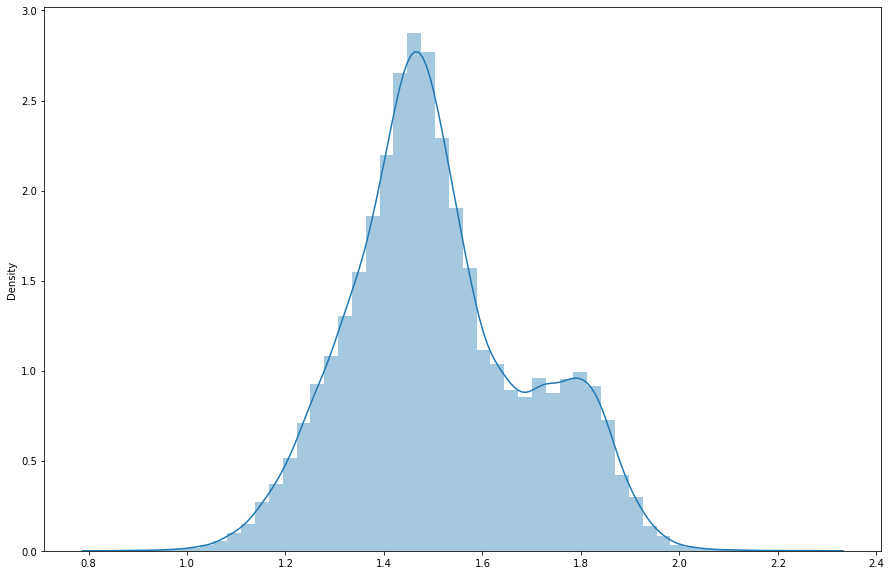

In [62]:
plt.figure(figsize=(15,10))
sns.distplot(y_train)
plt.show()

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [64]:
Model = Ridge()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='r2')
grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             scoring='r2', verbose=1)

In [65]:
Model_best = grid_search.best_estimator_

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
y_test = y_test**0.3
y_pred_train = Model_best.predict(X_train_rfe)
y_pred_test = Model_best.predict(X_test[col])

In [67]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)
r2_train_lr

0.5715612015036249

In [68]:
r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)
r2_test_lr

0.5706865718680714

Como podemos ver, os valores de R-quadrado ainda são ruins e o modelo ainda sofre overfit. Portanto, tentaremos um modelo Random Forest.

In [69]:
X = Songs.drop('duration_min',axis=1)
y = Songs['duration_min']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Model = RandomForestRegressor(random_state=100,n_jobs=-1)

params = {'n_estimators':[200],
         'max_depth':[5,10,13,15,18,20],
         'min_samples_leaf':[100,200,400,600,800,1000],
         'max_features':[0.05,0.1,0.15,0.2]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 13, 15, 18, 20],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [100, 200, 400, 600, 800, 1000],
                         'n_estimators': [200]},
             scoring='r2', verbose=1)

In [72]:
Model_best = grid_search.best_estimator_

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = Model_best.predict(X_train)
y_pred_test = Model_best.predict(X_test)


In [74]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)
r2_train_lr

0.6437046329592024

In [75]:
r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)
r2_test_lr

0.6346695829470947

In [76]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance.sort_values(by='Importance',ascending=False,inplace=True)
Feature_importance.set_index('Feature',inplace=True)
Feature_importance.head()

,Importance
Feature,
instrumentalness,0.292014
psytrance,0.203350
techno,0.112187
acousticness,0.072103
tempo,0.056128


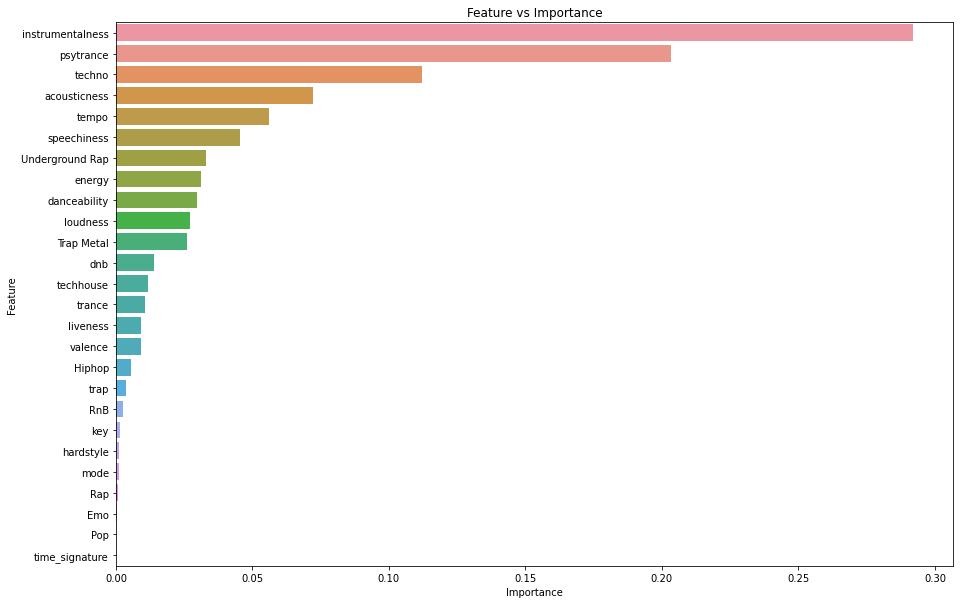

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(x=Feature_importance.Importance,y=Feature_importance.index)
plt.title('Feature vs Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Como podemos ver, obtemos valores de R-quadrado muito melhores usando Random Forrests. No entanto, vamos agora tentar aumentar o gradiente.

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
Model = GradientBoostingRegressor(random_state=100)

params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5],
         'max_depth':[5,10,13,15,18,20],
         'min_samples_leaf':[100,200,400,600,800,1000],
         'max_features':[0.05,0.1,0.15,0.2]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(estimator=GradientBoostingRegressor(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [5, 10, 13, 15, 18, 20],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [100, 200, 400, 600, 800, 1000]},
             scoring='r2', verbose=1)

In [80]:
Model_best = grid_search.best_estimator_

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = Model_best.predict(X_train)
y_pred_test = Model_best.predict(X_test)

In [82]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)
r2_train_lr

0.7853483766882785

In [83]:
r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)
r2_test_lr

0.6947584379755716

In [84]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance.sort_values(by='Importance',ascending=False,inplace=True)
Feature_importance.set_index('Feature',inplace=True)
Feature_importance.head()

,Importance
Feature,
instrumentalness,0.286155
psytrance,0.166629
techno,0.085289
tempo,0.070616
acousticness,0.062050


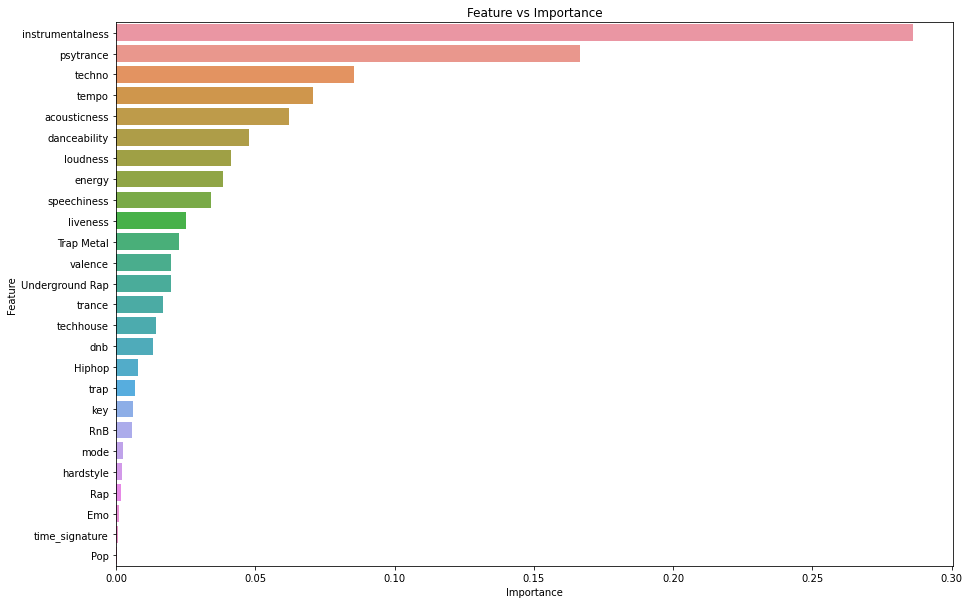

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(x=Feature_importance.Importance,y=Feature_importance.index)
plt.title('Feature vs Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Como podemos ver, obtemos pontuações melhores usando o aumento de gradiente, mesmo em florestas aleatórias, mesmo com um pouco de overfitting.